In [1]:
import os, sys, time
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
%matplotlib inline

from IPython.display import display, HTML

if (sys.version_info < (3, 0)):
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
# Create timestamp to show when this summary was run
print('Summary run: ' + time.strftime("%a, %d %b %Y %H:%M"))

Summary run: Wed, 19 Apr 2023 09:31


In [3]:
relative_path = '../../../../outputs'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

# Traffic Counts
----
### Daily | By Facility Type

In [4]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

In [5]:
_df = df.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"33,343,898","34,238,929","895,031",2.68%
Arterial,"26,416,245","25,573,523","-842,722",-3.19%
Collector,"4,607,593","3,715,391","-892,202",-19.36%
Ramp,"2,707,279","2,444,153","-263,126",-9.72%
Total,"67,075,015","65,971,996","-1,103,019",-1.64%


#### Daily | By Facility Type - Pierce County

In [6]:
df1 = df[df['county'] == 'Pierce']

In [7]:
_df = df1.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"10,838,500","10,796,765","-41,735",-0.39%
Arterial,"7,844,914","8,044,013","199,099",2.54%
Collector,"1,071,045","912,341","-158,704",-14.82%
Ramp,"2,179,260","1,991,670","-187,590",-8.61%
Total,"21,933,719","21,744,789","-188,930",-0.86%


#### Daily | By Facility Type - Other Counties

In [8]:
df2 = df[df['county'] != 'Pierce']

In [9]:
_df = df2.groupby('@facilitytype').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df.reindex(['Freeway', 'Arterial', 'Collector', 'Ramp', 'Total'])

,observed,modeled,diff,percent_diff
@facilitytype,,,,
Freeway,"22,505,398","23,442,164","936,766",4.16%
Arterial,"18,571,331","17,529,510","-1,041,821",-5.61%
Collector,"3,536,548","2,803,050","-733,498",-20.74%
Ramp,"528,019","452,483","-75,536",-14.31%
Total,"45,141,296","44,227,207","-914,089",-2.02%


----
### Daily | By County

In [10]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume_county_facility.csv'))
df[['modeled','observed']] = df[['modeled','observed']].astype('float')

_df = df.groupby('county').sum()[['observed','modeled']]
_df.loc['Total',:] = _df.sum().values
_df['diff'] = _df['modeled']-_df['observed']
_df['percent_diff'] = _df['diff']/_df['observed']
_df[['percent_diff']] = _df[['percent_diff']].applymap(format_percent)
_df

,observed,modeled,diff,percent_diff
county,,,,
King,"31,199,530","31,307,715","108,185",0.35%
Kitsap,"4,557,863","3,949,756","-608,107",-13.34%
Pierce,"21,933,719","21,744,789","-188,930",-0.86%
Snohomish,"9,383,903","8,969,736","-414,167",-4.41%
Total,"67,075,015","65,971,996","-1,103,019",-1.64%


----
### Daily | Scatterplots 

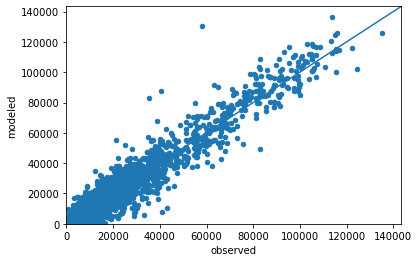

In [11]:
df = pd.read_csv(os.path.join(relative_path,'validation','daily_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)

In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

r^2: 0.9669959062312583


---
By County

King r^2: 0.9704228398849531
Kitsap r^2: 0.9523983381382319
Pierce r^2: 0.9750216330382248


Snohomish r^2: 0.936750084629409


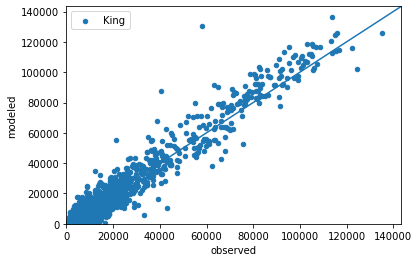

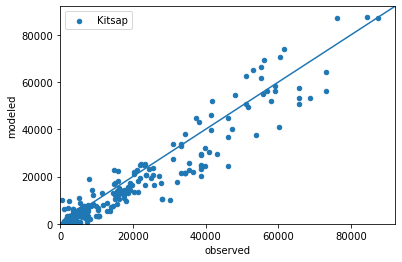

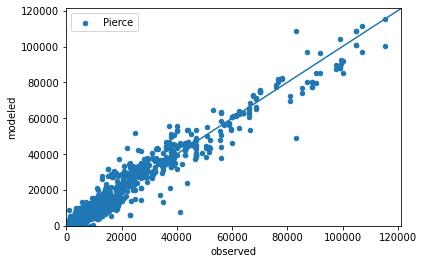

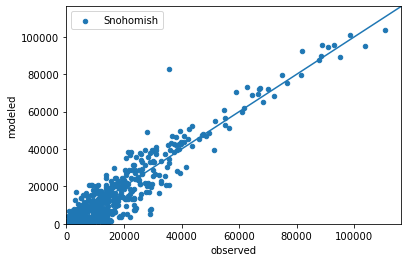

In [13]:
for county in np.unique(df[~df.county.isna()]['county']):
    _df = df[df['county'] == county]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=county)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    print(str(county) + ' r^2: ' + str(r_value))

---
By Facility Type

r^2 Freeway: 0.9429838620750189
r^2 Arterial: 0.8770232404683383


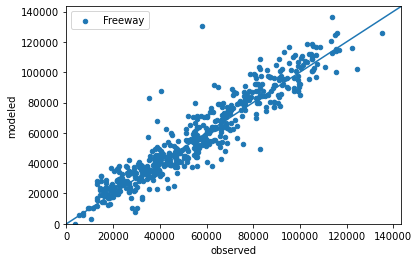

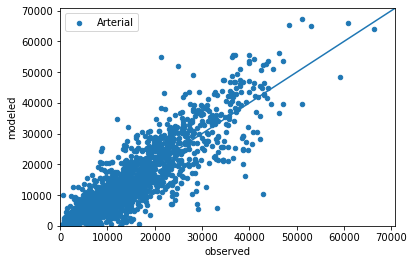

In [14]:
for factype in ['Freeway','Arterial']:
    _df = df[df['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

By Facility Type - Pierce County

r^2 Freeway: 0.9550093903763581
r^2 Arterial: 0.9444029843742884


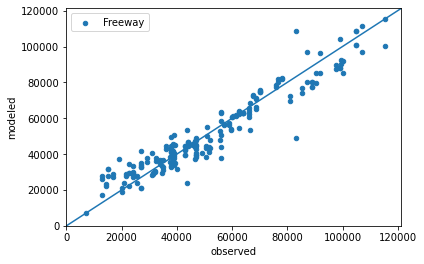

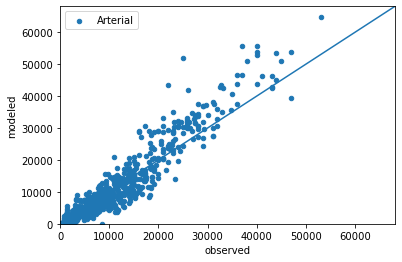

In [15]:
df1 = df[df['county'] == 'Pierce']
for factype in ['Freeway','Arterial']:
    _df = df1[df1['@facilitytype'] == factype]
    ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
    lim = _df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
    print('r^2 ' + str(factype) + ': ' + str(r_value))

By Facility Type - Other Counties

r^2 Freeway: 0.9432795626579603
r^2 Arterial: 0.8417565965519597


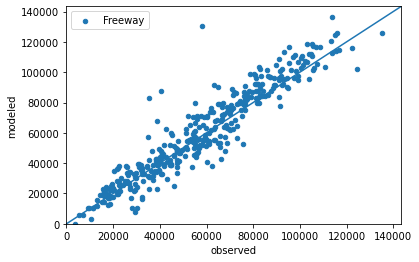

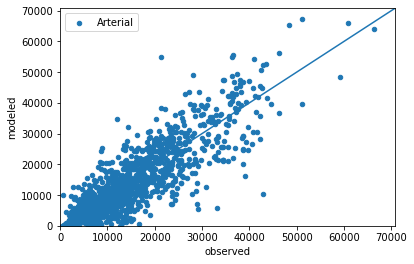

In [16]:
df2 = df[(df['county'] != 'Pierce') & (~df.county.isna())]
if df2.shape[0] > 0:
    for factype in ['Freeway','Arterial']:
        _df = df2[df2['@facilitytype'] == factype]
        ax = _df.plot(kind='scatter', x='observed', y='modeled', label=factype)
        lim = _df[['observed','modeled']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed'],_df['modeled'])
        print('r^2 ' + str(factype) + ': ' + str(r_value))

**Hourly Volumes**


r^2: 0.9480070611563869


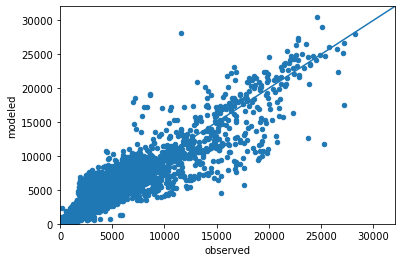

In [17]:
df = pd.read_csv(os.path.join(relative_path,'validation','hourly_volume.csv'))
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2: ' + str(r_value))

**Hourly Volumes - Pierce County**

r^2: 0.9174926713016234


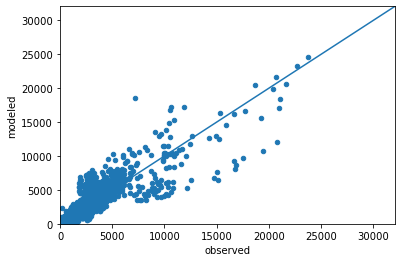

In [18]:
df1 = df[df['county'] == 'Pierce']
ax = df1.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['observed'],df1['modeled'])
print('r^2: ' + str(r_value))

**Hourly Volumes - Other Counties**

r^2: 0.9257732513828365


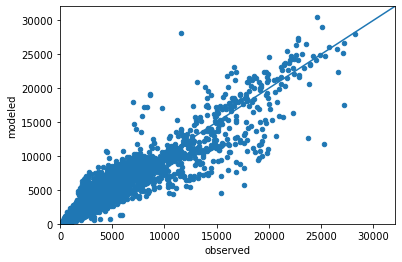

In [19]:
df2 = df[df['county'] != 'Pierce']
ax = df2.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df2['observed'],df2['modeled'])
print('r^2: ' + str(r_value))

# Screenlines

In [20]:
df = pd.read_csv(os.path.join(relative_path,'validation','screenlines.csv'))
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'name'] = 'TOTAL'
#df.at['C', 'name'] = 10
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","558,975",King,"-9,442",-1.66%
1,KENT,"550,322","533,924",King,"-16,398",-2.98%
2,SEATTLE - SOUTH OF CBD,"526,500","546,202",King,"19,702",3.74%
3,SHIP CANAL,"519,802","575,023",King,"55,221",10.62%
4,NS-02,"517,266","506,922",Pierce,"-10,344",-2.00%
5,KIRKLAND-REDMOND,"414,120","413,798",King,-322,-0.08%
6,MILL CREEK,"400,848","402,217",King,"1,369",0.34%
7,SOUTH BELLEVUE,"399,500","389,135",King,"-10,365",-2.59%
8,EW-05,"376,912","368,818",Pierce,"-8,094",-2.15%
9,SEATTLE - NORTH,"372,000","395,449",King,"23,449",6.30%


r^2 : 0.9940755573873031


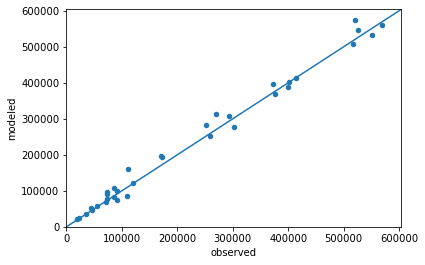

In [21]:
df = df.head(-1)
ax = df.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['observed'],df['modeled'])
print('r^2 : ' + str(r_value))

#### Screelines - Pierce County

In [22]:
df1 = df[df['county'] == 'Pierce']
df1 = df1.append(df1.sum(numeric_only=True), ignore_index=True)
df1.at[df1.index[-1], 'name'] = 'TOTAL'
#df1.at['C', 'name'] = 10
df1['percent_diff'] = df1['diff']/df1['observed']
df1[['percent_diff']] = df1[['percent_diff']].applymap(format_percent)
df1

,name,observed,modeled,county,diff,percent_diff
0,NS-02,"517,266","506,922",Pierce,"-10,344",-2.00%
1,EW-05,"376,912","368,818",Pierce,"-8,094",-2.15%
2,EW-04,"302,884","277,037",Pierce,"-25,847",-8.53%
3,EW-06,"172,178","194,562",Pierce,"22,384",13.00%
4,EW-03,"170,814","196,182",Pierce,"25,368",14.85%
5,EW-08,"120,500","122,135",Pierce,"1,635",1.36%
6,NS-03,"91,908","74,872",Pierce,"-17,036",-18.54%
7,EW-02,"86,000","81,663",Pierce,"-4,337",-5.04%
8,NS-05,"85,764","106,501",Pierce,"20,737",24.18%
9,EW-01,"72,780","96,510",Pierce,"23,730",32.61%


r^2 : 0.9945706020582851


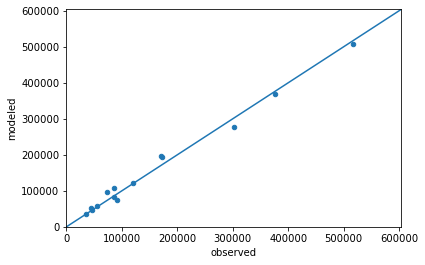

In [23]:
df1 = df1.head(-1)
ax = df1.plot(kind='scatter', x='observed', y='modeled')
lim = df[['observed','modeled']].max().max()*1.05
ax.set_ylim(0,lim)
ax.set_xlim(0,lim)
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)
slope, intercept, r_value, p_value, std_err = stats.linregress(df1['observed'],df1['modeled'])
print('r^2 : ' + str(r_value))

#### Screelines - Other Counties

In [24]:
df2 = df[df['county'] != 'Pierce']
df2 = df2.append(df2.sum(numeric_only=True), ignore_index=True)
df2.at[df2.index[-1], 'name'] = 'TOTAL'
#df2.at['C', 'name'] = 10
df2['percent_diff'] = df2['diff']/df2['observed']
df2[['percent_diff']] = df2[['percent_diff']].applymap(format_percent)
df2

,name,observed,modeled,county,diff,percent_diff
0,AUBURN - SOUTH KING,"568,417","558,975",King,"-9,442",-1.66%
1,KENT,"550,322","533,924",King,"-16,398",-2.98%
2,SEATTLE - SOUTH OF CBD,"526,500","546,202",King,"19,702",3.74%
3,SHIP CANAL,"519,802","575,023",King,"55,221",10.62%
4,KIRKLAND-REDMOND,"414,120","413,798",King,-322,-0.08%
5,MILL CREEK,"400,848","402,217",King,"1,369",0.34%
6,SOUTH BELLEVUE,"399,500","389,135",King,"-10,365",-2.59%
7,SEATTLE - NORTH,"372,000","395,449",King,"23,449",6.30%
8,BOTHELL,"293,729","307,085",King,"13,356",4.55%
9,LYNNWOOD-BOTHELL,"269,900","313,482",King,"43,582",16.15%


r^2 : 0.9935493441713026


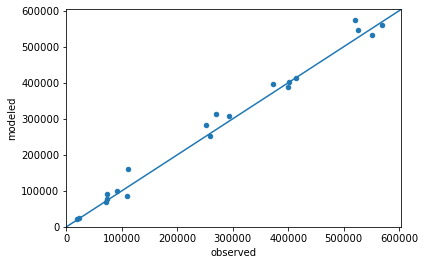

In [25]:
df2 = df2.head(-1)
if df2.shape[0] > 0:
    ax = df2.plot(kind='scatter', x='observed', y='modeled')
    lim = df[['observed','modeled']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df2['observed'],df2['modeled'])
    print('r^2 : ' + str(r_value))

# Transit Boarding
----
### By Agency

In [26]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_agency.csv')

df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
sorted_values = df.sort_values('observed_5to20', ascending=False).agency.to_list() + ['TOTAL']
df = df.append(df.sum(numeric_only=True), ignore_index=True)
df.at[df.index[-1], 'agency'] = 'TOTAL'
df[['perc_diff']] = df['diff']/df['observed_5to20']
df[['perc_diff']] = df[['perc_diff']].applymap(format_percent)
df.set_index('agency').reindex(sorted_values)

,county,observed_5to20,modeled_5to20,diff,perc_diff
agency,,,,,
King County Metro,NaN,"392,694","315,082","-77,612",-19.76%
Sound Transit,NaN,"145,426","130,662","-14,763",-10.15%
Community Transit,NaN,"30,918","29,357","-1,561",-5.05%
Pierce Transit,Pierce,"27,233","25,444","-1,789",-6.57%
Washington Ferries,NaN,"16,912","7,813","-9,099",-53.80%
Kitsap Transit,NaN,"8,669","10,068","1,399",16.14%
Everett Transit,NaN,"3,290","1,772","-1,519",-46.16%
TOTAL,NaN,"625,142","520,198","-104,944",-16.79%


### By Route for PierceTransit

In [27]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_route.csv')
df[['observed_5to20','modeled_5to20','diff']] = df[['observed_5to20','modeled_5to20','diff']].astype('float')
df.drop(columns=['county'],inplace=True)
df_piercetransit = df[df.agency=='Pierce Transit'].copy()
df_piercetransit = df_piercetransit.sort_values('observed_5to20', ascending=False)
df_piercetransit['route_code'] = df_piercetransit['route_code']-2000
df_piercetransit = df_piercetransit.append(df_piercetransit.sum(numeric_only=True), ignore_index=True)
df_piercetransit.at[df_piercetransit.index[-1], 'agency'] = 'TOTAL'
df_piercetransit.at[df_piercetransit.index[-1], 'route_code'] = 0
df_piercetransit.at[df_piercetransit.index[-1], 'description'] = 'TOTAL'
df_piercetransit[['perc_diff']] = (df_piercetransit['diff']/df_piercetransit['observed_5to20']).values
df_piercetransit[['perc_diff']] = df_piercetransit[['perc_diff']].applymap(format_percent)
df_piercetransit

,agency,route_code,description,observed_5to20,modeled_5to20,diff,perc_diff
0,Pierce Transit,1,1 6th Ave / Pacific,"4,975","4,714",-261,-5.24%
1,Pierce Transit,2,2 Bridgeport / S 19t,"2,330","1,478",-853,-36.59%
2,Pierce Transit,3,3 South Tacoma Way,"1,598","1,760",162,10.14%
3,Pierce Transit,4,4 S 112th St,"1,273","1,427",154,12.06%
4,Pierce Transit,48,48 Sheridan/M st,"1,174",577,-597,-50.86%
5,Pierce Transit,500,500 Federal Way,"1,138","2,117",979,85.98%
6,Pierce Transit,402,402 Meridian/Federal,"1,124","2,663","1,540",137.03%
7,Pierce Transit,41,41 56th St/Salishan,"1,039","1,045",7,0.64%
8,Pierce Transit,57,57 Tacoma Mall,"1,018",415,-603,-59.20%
9,Pierce Transit,202,202 72nd Street,"1,007",276,-731,-72.59%


----
### Key Routes
#### Ferries

In [28]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([5001,5002,5003,5004,5005,5006,5007,1973,1975])].reset_index()
_df.drop(['route_code','agency'], axis=1, inplace=True)
sorted_values = _df.sort_values('observed_5to20', ascending=False).description.to_list() + ['TOTAL']
_df = _df.append(_df.sum(numeric_only=True), ignore_index=True)
_df.at[_df.index[-1], 'description'] = 'TOTAL'
_df[['perc_diff']] = _df['diff']/_df['observed_5to20']
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df

,description,county,observed_5to20,modeled_5to20,diff,perc_diff
0,POF Seattle - West S,NaN,"1,356",406,-950,-70.09%
1,POF Seattle - Vashon,NaN,670,450,-220,-32.83%
2,WSF Kingston - Edmon,NaN,"1,732",273,"-1,459",-84.25%
3,WSF Bainbridge Islan,NaN,"8,857","5,212","-3,644",-41.15%
4,WSF Bremerton - Seat,NaN,"4,484",933,"-3,551",-79.18%
5,WSF Fauntleroy - Sou,NaN,365,14,-351,-96.17%
6,WSF Vashon Island -,NaN,946,"1,084",138,14.57%
7,WSF Southworth - Vas,NaN,239,136,-103,-43.11%
8,WSF Point Defiance -,NaN,289,161,-128,-44.37%
9,TOTAL,0,"18,937","8,668","-10,269",-54.23%


r^2 : 0.977615772910036


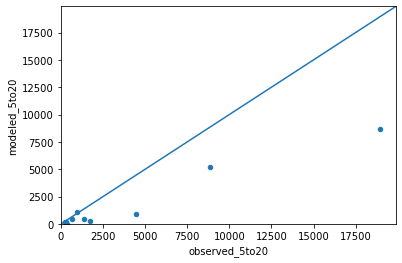

In [29]:
if len(_df) > 0:
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### Bikes on Ferries

In [30]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'bike_ferry_boardings.csv')
df['route_code'] = df['route_code'].astype('int')
df[['route_code','description', '@bvol']].sort_values('@bvol', ascending=False)

,route_code,description,@bvol
0,1973,POF West Seattle - S,555
4,4202,POF Bremerton - Anna,461
3,4201,POF Bremerton - Pt O,408
1,1975,POF Vashon Island -,392
2,4200,POF Seattle - Bremer,375
7,5003,WSF Bremerton - Seat,289
8,5005,WSF Vashon Island -,84
10,5007,WSF Point Defiance -,68
9,5006,WSF Southworth - Vas,62
6,5002,WSF Bainbridge Islan,51


#### Rail

In [31]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_key_routes.csv', index_col='description')
df[['observed_5to20','modeled_5to20']] = df[['observed_5to20','modeled_5to20']].astype('float')
_df = df[df['route_code'].isin([6996,6999,6998])].reset_index()
_df['description'] = _df['route_code'].map({6998: 'Sounder South', 6999: 'Sounder North',6996: 'Link Red Line'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)

_df

,description,county,observed_5to20,modeled_5to20,diff,perc_diff
0,Link Red Line,NaN,"69,383","52,239","-17,144",-24.71%
1,Sounder South,NaN,"15,356","14,197","-1,159",-7.55%
2,Sounder North,NaN,"1,667","1,964",298,17.86%


r^2 : 0.9990710980392757


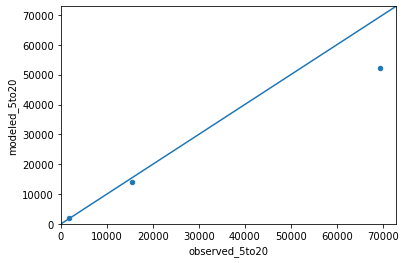

In [32]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

#### RapidRide, Busiest Buses, Streetcar

In [33]:
_df = df[df['route_code'].isin([1671,1672,1673,1674,1675,1676,6550,1007,1040,1997,1998])].reset_index()
_df['description'] = _df['route_code'].map({1671: 'A Line RapidRide', 1672: 'B Line RapidRide',
                                            1673: 'C Line RapidRide', 1674: 'D Line RapidRide',
                                            1675: 'E Line RapidRide', 1676: 'F Line RapidRide',
                                            6550: 'Sound Transit 550', 1040: 'KC Metro 40', 1007: 'KC Metro 7',
                                            1997: 'SLU Streetcar', 1998: 'First Hill Streetcar'})
_df.drop(['route_code','agency'], axis=1, inplace=True)
_df[['perc_diff']] = _df[['perc_diff']].applymap(format_percent)
_df.sort_values('modeled_5to20', ascending=False)

,description,county,observed_5to20,modeled_5to20,diff,perc_diff
6,E Line RapidRide,NaN,"15,336","10,765","-4,571",-29.80%
10,Sound Transit 550,NaN,"9,168","9,812",645,7.03%
4,C Line RapidRide,NaN,"11,368","9,782","-1,586",-13.95%
1,KC Metro 40,NaN,"11,405","9,762","-1,643",-14.41%
2,A Line RapidRide,NaN,"8,522","7,816",-706,-8.28%
0,KC Metro 7,NaN,"10,150","7,639","-2,511",-24.74%
5,D Line RapidRide,NaN,"13,078","7,387","-5,691",-43.52%
7,F Line RapidRide,NaN,"5,267","5,204",-63,-1.19%
3,B Line RapidRide,NaN,"5,914","5,032",-882,-14.91%
8,SLU Streetcar,NaN,"1,703","1,344",-359,-21.10%


r^2 : 0.8888956748509421


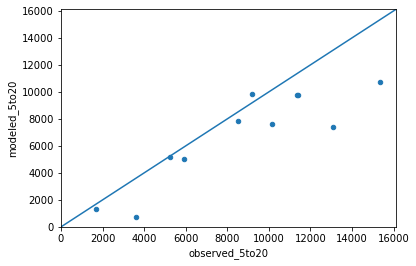

In [34]:
if len(_df) > 0: 
    ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20')
    lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
    ax.set_ylim(0,lim)
    ax.set_xlim(0,lim)
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, x)
    slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
    print('r^2 ' + str('') + ': ' + str(r_value))

---
### Lines by Agency

r^2 Community Transit: 0.8542582849944188


r^2 Everett Transit: -0.36169458869368076
r^2 King County Metro: 0.9222646329335957
r^2 Kitsap Transit: 0.7969623914657941
r^2 Pierce Transit: 0.8348416602380545
r^2 Sound Transit: 0.9930538641582604


r^2 Washington Ferries: 0.9257038462611012


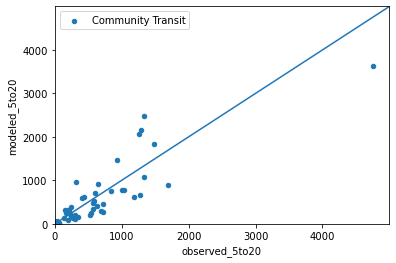

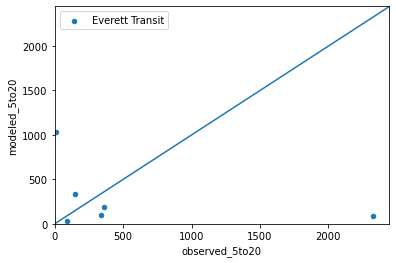

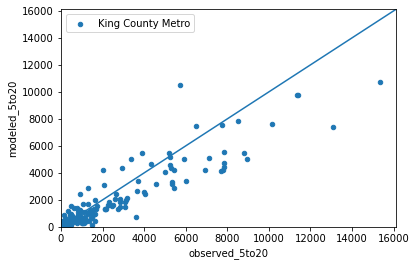

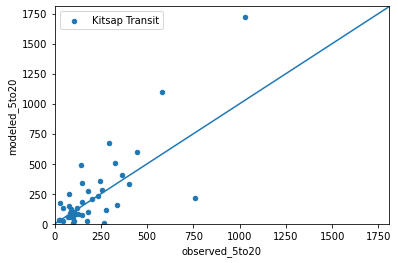

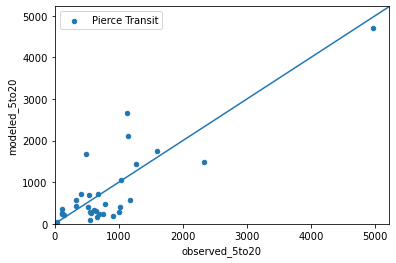

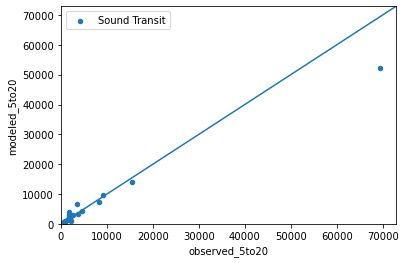

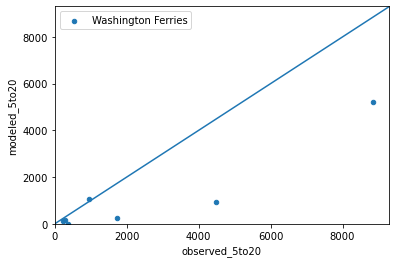

In [35]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'daily_boardings_by_line.csv', index_col='agency')
df = df[-df['agency_id'].isnull()]

for agency in np.unique(df.index):
    _df = df.loc[agency,:]
    if (type(_df) == pd.core.frame.DataFrame) & (len(df) > 0):
        ax = _df.plot(kind='scatter', x='observed_5to20', y='modeled_5to20', label=agency)
        lim = _df[['observed_5to20','modeled_5to20']].max().max()*1.05
        ax.set_ylim(0,lim)
        ax.set_xlim(0,lim)
        x = np.linspace(*ax.get_xlim())
        ax.plot(x, x)
        slope, intercept, r_value, p_value, std_err = stats.linregress(_df['observed_5to20'],_df['modeled_5to20'])
        print('r^2 ' + str(agency) + ': ' + str(r_value))

# Light Rail Station Boardings
----
Red Line

In [36]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_boardings.csv', index_col='station_name')
df['diff'] = df['modeled_5to20']-df['observed_5to20']
df['percent_diff'] = df['diff']/df['observed_5to20']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,county,observed_5to20,modeled_5to20,diff,percent_diff
station_name,,,,,
Husky Stadium,NaN,"9,416","6,860","-2,556",-27.15%
Westlake,NaN,"10,904","7,231","-3,672",-33.68%
University St,NaN,"5,257","4,390",-867,-16.49%
Pioneer Square,NaN,"3,865","4,750",885,22.90%
Int'l District,NaN,"5,647","2,878","-2,770",-49.05%
Capitol Hill,NaN,"7,016","5,206","-1,811",-25.81%
Stadium,NaN,"1,912",756,"-1,157",-60.48%
SODO,NaN,"2,108","3,003",896,42.50%
Beacon Hill,Pierce,"2,587","1,502","-1,085",-41.94%


Sound Transit Station Groupings

In [37]:
df_combined = df.copy()

df_combined['station_group'] = df.index
df_combined.loc[['Westlake'],'station_group'] = 'Westlake/University St'
df_combined.loc[['University St'],'station_group'] = 'Westlake/University St'

df_combined.loc[['Pioneer Square'],'station_group'] = "Pioneer Square/Int'l District"
df_combined.loc[["Int'l District"],'station_group'] = "Pioneer Square/Int'l District"

df_combined.loc[['Stadium'],'station_group'] = 'Stadium/SODO'
df_combined.loc[['SODO'],'station_group'] = 'Stadium/SODO'

df_combined.loc[['Beacon Hill'],'station_group'] = 'Beacon Hill/Mount Baker'
df_combined.loc[['Mount Baker'],'station_group'] = 'Beacon Hill/Mount Baker'

df_combined.loc[['Othello'],'station_group'] = 'Othello/Rainier Beach'
df_combined.loc[['Rainier Beach'],'station_group'] = 'Othello/Rainier Beach'

df_combined = df_combined.groupby('station_group').sum()[['observed_5to20','modeled_5to20']]
df_combined['diff'] = df_combined['modeled_5to20']-df_combined['observed_5to20']
df_combined['percent_diff'] = df_combined['diff']/df_combined['observed_5to20']
df_combined[['percent_diff']] = df_combined[['percent_diff']].applymap(format_percent)

df_combined.loc[['Husky Stadium','Capitol Hill','Westlake/University St',"Pioneer Square/Int'l District",
                 'Stadium/SODO','Beacon Hill/Mount Baker','Columbia City','Othello/Rainier Beach',
                "Tukwila Int'l Blvd",'SeaTac/Airport','Angle Lake']]

,observed_5to20,modeled_5to20,diff,percent_diff
station_group,,,,
Husky Stadium,"9,416","6,860","-2,556",-27.15%
Capitol Hill,"7,016","5,206","-1,811",-25.81%
Westlake/University St,"16,161","11,622","-4,539",-28.09%
Pioneer Square/Int'l District,"9,512","7,628","-1,885",-19.81%
Stadium/SODO,"4,020","3,759",-261,-6.49%
Beacon Hill/Mount Baker,"4,809","2,967","-1,842",-38.31%
Columbia City,"2,376","1,431",-945,-39.78%
Othello/Rainier Beach,"4,412","2,692","-1,720",-38.98%
Tukwila Int'l Blvd,"2,779","2,396",-383,-13.80%


# Stop Transfers

### Light Rail

In [38]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'light_rail_transfers.csv', index_col='station_name')
pd.options.display.float_format = '{:0,.2f}'.format
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)
df

,county,modeled_transfer_rate,observed_transfer_rate,diff,percent_diff
station_name,,,,,
Husky Stadium,NaN,0.37,-99.00,99.37,-100.37%
Westlake,NaN,0.41,0.36,0.04,12.07%
University St,NaN,0.45,0.20,0.25,127.03%
Pioneer Square,NaN,0.50,0.16,0.34,211.53%
Int'l District,NaN,0.71,0.45,0.26,58.63%
Capitol Hill,NaN,0.06,-99.00,99.06,-100.06%
Stadium,NaN,0.24,0.12,0.12,100.51%
SODO,NaN,0.33,0.31,0.02,6.85%
Beacon Hill,Pierce,0.51,0.35,0.16,44.23%


# Externals

In [39]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'external_volumes.csv', index_col='location')
pd.options.display.float_format = '{:0,.0f}'.format
df = df.drop('diff', axis=1)
df['diff'] = df['modeled']-df['observed']
df = df.fillna(0)
df.loc['Total',['observed','modeled','diff']] = df[['observed','modeled','diff']].sum()
df['percent_diff'] = df['diff']/df['observed']
df[['percent_diff']] = df[['percent_diff']].applymap(format_percent)

df[['external_station']] = df[['external_station']].applymap('{:0.0f}'.format)
df.replace('nan', '', regex=True)

,external_station,county,observed,modeled,diff,percent_diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"130,000","122,980","-7,020",-5.40%
I-5 to Mount Vernon,3744,Snohomish,"67,000","52,798","-14,202",-21.20%
I-90 @ Snoqualmie Pass,3739,King,"33,000","26,390","-6,610",-20.03%
SR-532 to Camano Island,3746,Snohomish,"23,000","19,110","-3,890",-16.91%
SR-507 to Yelm,3734,Pierce,"23,000","18,302","-4,698",-20.43%
SR-3 to Belfair,3749,Kitsap,"18,000","15,079","-2,921",-16.23%
Hood Canal Bridge,3748,Kitsap,"18,000","15,159","-2,841",-15.79%
SR-530 N/O Stanwood,3745,Snohomish,"9,100","7,977","-1,123",-12.34%
Mukilteo-Clinton Ferry,3747,Snohomish,"6,300","5,499",-801,-12.71%


#### Externals - Pierce County

In [40]:
df1 = df[df['county'] == 'Pierce']
pd.options.display.float_format = '{:0,.0f}'.format
df1 = df1.drop('diff', axis=1)
df1['diff'] = df1['modeled']-df1['observed']
df1 = df1.fillna(0)
df1.loc['Total',['observed','modeled','diff']] = df1[['observed','modeled','diff']].sum()
df1['percent_diff'] = df1['diff']/df1['observed']
df1[['percent_diff']] = df1[['percent_diff']].applymap(format_percent)

#df1[['external_station']] = df1[['external_station']].applymap('{:0.0f}'.format)
df1.replace('nan', '', regex=True)

,external_station,county,observed,modeled,percent_diff,diff
location,,,,,,
I-5 to Olympia,3733,Pierce,"130,000","122,980",-5.40%,"-7,020"
SR-507 to Yelm,3734,Pierce,"23,000","18,302",-20.43%,"-4,698"
SR-302 to Shelton,3750,Pierce,"4,100","3,951",-3.63%,-149
SR-7 to Morton,3735,Pierce,"2,700","1,988",-26.35%,-712
SR-706 to Longmire,3736,Pierce,"1,800","1,795",-0.29%,-5
SR-123 S/O Cayuse Pass,3737,Pierce,"1,100",523,-52.49%,-577
SR 410 E/O Cayuse Pass,3738,Pierce,960,530,-44.75%,-430
Total,NaN,NaN,"163,660","150,069",-8.30%,"-13,591"


#### Externals - Other Counties

In [41]:
df2 = df[df['county'].isin(['Snohomish', 'Kitsap', 'King'])]
pd.options.display.float_format = '{:0,.0f}'.format
df2 = df2.drop('diff', axis=1)
df2['diff'] = df2['modeled']-df2['observed']
df2 = df2.fillna(0)
df2.loc['Total',['observed','modeled','diff']] = df2[['observed','modeled','diff']].sum()
df2['percent_diff'] = df2['diff']/df2['observed']
df2[['percent_diff']] = df2[['percent_diff']].applymap(format_percent)

#df2[['external_station']] = df2[['external_station']].applymap('{:0.0f}'.format)
df2.replace('nan', '', regex=True)

,external_station,county,observed,modeled,percent_diff,diff
location,,,,,,
I-5 to Mount Vernon,3744,Snohomish,"67,000","52,798",-21.20%,"-14,202"
I-90 @ Snoqualmie Pass,3739,King,"33,000","26,390",-20.03%,"-6,610"
SR-532 to Camano Island,3746,Snohomish,"23,000","19,110",-16.91%,"-3,890"
SR-3 to Belfair,3749,Kitsap,"18,000","15,079",-16.23%,"-2,921"
Hood Canal Bridge,3748,Kitsap,"18,000","15,159",-15.79%,"-2,841"
SR-530 N/O Stanwood,3745,Snohomish,"9,100","7,977",-12.34%,"-1,123"
Mukilteo-Clinton Ferry,3747,Snohomish,"6,300","5,499",-12.71%,-801
SR-2 @ Stevens Pass,3740,King,"5,600","2,905",-48.12%,"-2,695"
SR-530 N/O Darrington,3742,Snohomish,"1,600","1,062",-33.63%,-538


# Corridor Speed

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

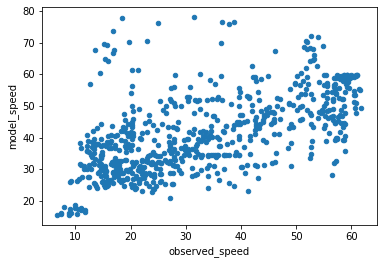

In [42]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df.plot(kind='scatter', y='model_speed', x='observed_speed')

## Pierce County

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

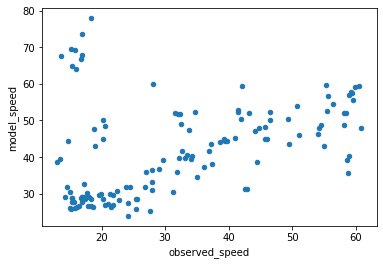

In [43]:
df.loc[df.county=='Pierce'].plot(kind='scatter', y='model_speed', x='observed_speed')

## Other Counties

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

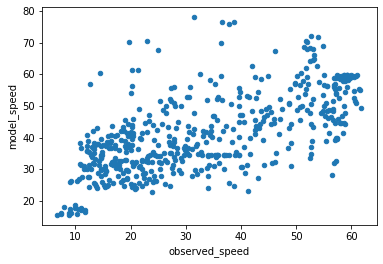

In [44]:
_df = df.loc[df.county!='Pierce']
_df = _df.groupby(['Corridor_Number', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda xdf: xdf.length*60/xdf.auto_time)
_df.plot(kind='scatter', y='model_speed', x='observed_speed')

### AM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

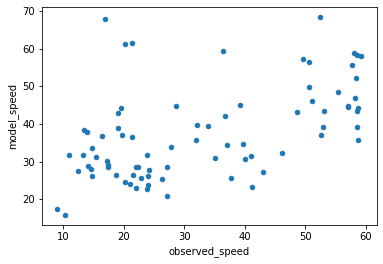

In [45]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [46]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
12,Seattle to Everett - NB,39,58
13,Seattle to Everett - NB,43,58
30,Everett to Seattle - SB,21,27
31,Everett to Seattle - SB,29,27
48,Tacoma to Seattle - NB,26,24
49,Tacoma to Seattle - NB,24,24
66,Seattle to Tacoma - SB,44,59
67,Seattle to Tacoma - SB,36,59
84,Bellevue to Lynnwood - NB,45,57
85,Bellevue to Lynnwood - NB,45,57


## Pierce County

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

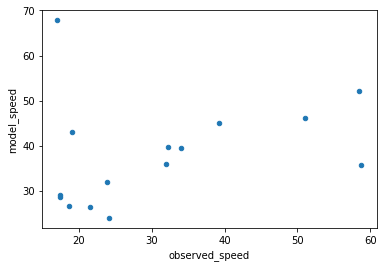

In [47]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county=='Pierce']
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [48]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
49,Tacoma to Seattle - NB,24,24
67,Seattle to Tacoma - SB,36,59
396,"SR 161, SR 18 to 264th St - SB",43,19
542,"SR 512, SR 167 to I-5 - WB",45,39
551,"SR 512, I-5 to SR 167 - EB",40,32
560,"SR 16, I-5 to Purdy Dr - WB",52,58
569,"SR 16, Purdy Dr to I-5 - EB",46,51
578,"56th Street/Cirque, Alaska to Bridgeport - WB",68,17
587,"19th Street, Bridgeport to Jefferson - EB",26,19
596,"74th/72nd/Pioneer, Meridian to Lakewood - WB",29,17


## Other Counties

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

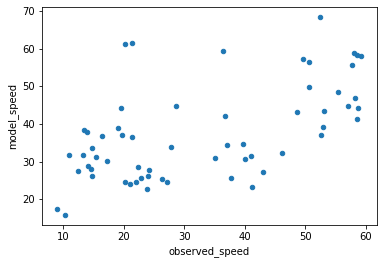

In [49]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county!='Pierce']
df = df.groupby(['Corridor_Number', 'Corridor_Description', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda df: df.length*60/df.auto_time)
df[df['tod'] == '7to8'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [50]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '7to8'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
6,Seattle to Everett - NB,41,58
15,Everett to Seattle - SB,25,27
24,Tacoma to Seattle - NB,26,24
33,Seattle to Tacoma - SB,44,59
42,Bellevue to Lynnwood - NB,45,57
51,Lynnwood to Bellevue - SB,25,22
60,Tukwila to Bellevue - NB,25,20
69,Bellevue to Tukwila - SB,27,43
78,Auburn to Renton - NB,29,22
87,Renton to Auburn - SB,48,56


### PM Peak, Primary Corridors

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

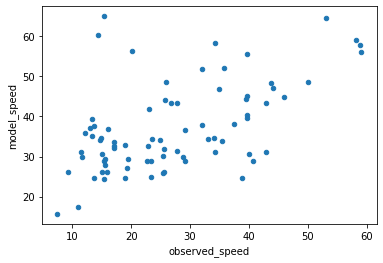

In [51]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds.csv')
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [52]:
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
2,Seattle to Everett - NB,25,23
3,Seattle to Everett - NB,29,23
20,Everett to Seattle - SB,31,28
21,Everett to Seattle - SB,43,28
38,Tacoma to Seattle - NB,43,43
39,Tacoma to Seattle - NB,31,43
56,Seattle to Tacoma - SB,30,25
57,Seattle to Tacoma - SB,26,25
74,Bellevue to Lynnwood - NB,26,26
75,Bellevue to Lynnwood - NB,32,26


## Pierce County

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

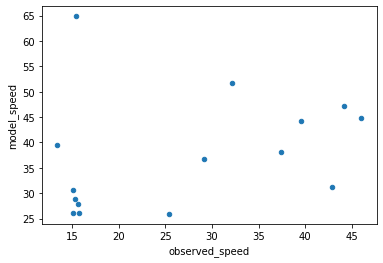

In [53]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county=='Pierce']
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [54]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
39,Tacoma to Seattle - NB,31,43
57,Seattle to Tacoma - SB,26,25
386,"SR 161, SR 18 to 264th St - SB",39,13
537,"SR 512, SR 167 to I-5 - WB",38,37
546,"SR 512, I-5 to SR 167 - EB",44,40
555,"SR 16, I-5 to Purdy Dr - WB",45,46
564,"SR 16, Purdy Dr to I-5 - EB",47,44
573,"56th Street/Cirque, Alaska to Bridgeport - WB",65,15
582,"19th Street, Bridgeport to Jefferson - EB",26,16
591,"74th/72nd/Pioneer, Meridian to Lakewood - WB",28,16


## Other Counties

<AxesSubplot:xlabel='observed_speed', ylabel='model_speed'>

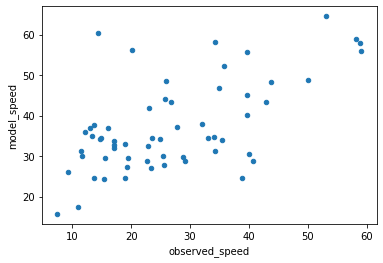

In [55]:
df = pd.read_csv(os.path.join(relative_path,'validation/') + 'corridor_speeds_county.csv')
df = df.loc[df.county!='Pierce']
df = df.groupby(['Corridor_Number', 'Corridor_Description', 'tod'], as_index=False).agg({'auto_time':sum, 'length':sum,'observed_speed':np.mean}).\
assign(model_speed=lambda df: df.length*60/df.auto_time)
df[df['tod'] == '16to17'].plot(kind='scatter', x='observed_speed', y='model_speed')

In [56]:
# Show daily AM and PM peaks by corridor
df[df['tod'] == '16to17'][['Corridor_Description','model_speed','observed_speed']].head(20)

,Corridor_Description,model_speed,observed_speed
1,Seattle to Everett - NB,27,23
10,Everett to Seattle - SB,37,28
19,Tacoma to Seattle - NB,43,43
28,Seattle to Tacoma - SB,30,25
37,Bellevue to Lynnwood - NB,28,26
46,Lynnwood to Bellevue - SB,40,40
55,Tukwila to Bellevue - NB,29,29
64,Bellevue to Tukwila - SB,25,19
73,Auburn to Renton - NB,48,44
82,Renton to Auburn - SB,31,34
